In [345]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
# It is a regression problem
df = pd.read_csv('laptop_data.csv')

In [347]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [348]:
df.shape

(1303, 12)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [350]:
# Checking the dubplicate rows
df.duplicated().sum()

0

In [351]:
# Checking the missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [352]:
# Dropping "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [353]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [354]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [355]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [356]:
# Updating the datatype of 'Ram' and 'Weight' column
df['Ram']    =  df['Ram'].astype('int32')
df['Weight'] =  df['Weight'].astype('float32') 

In [357]:
print(df['Ram'].dtype)
print(df['Weight'].dtype)

int32
float32


In [358]:
# finding numerical and categoricl column
num_columns = [ col for col in df.columns if df[col].dtypes != 'O']
cat_columns = [ col for col in df.columns if df[col].dtypes == 'O']
print(num_columns)
print(cat_columns)

['Inches', 'Ram', 'Weight', 'Price']
['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


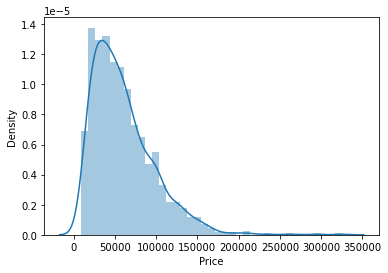

In [359]:
# Distribution of Price column
# df['Price'].plot(kind='kde')
# plt.show()

sns.distplot(df['Price'])
plt.show()

<AxesSubplot:>

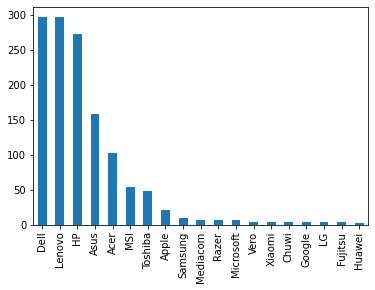

In [360]:
# Total laptops companywise
df['Company'].value_counts().plot(kind='bar')

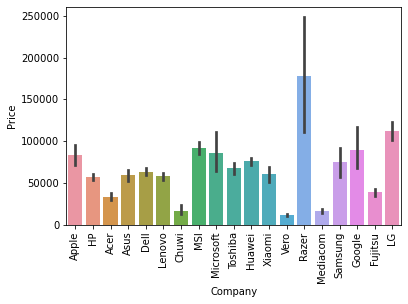

In [361]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

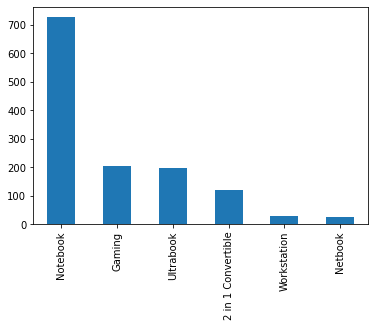

In [362]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

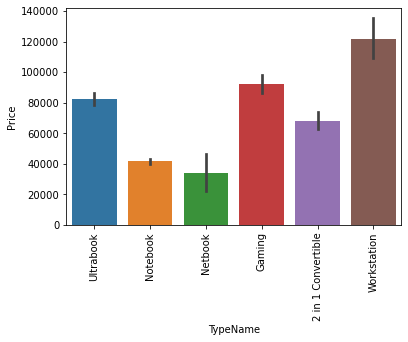

In [363]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


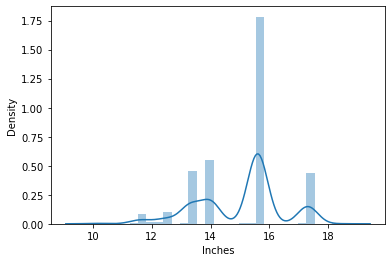

In [364]:
sns.distplot(df['Inches'])
plt.show()

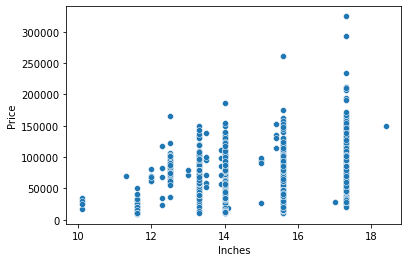

In [365]:
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.show()

In [366]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

In [367]:
# Creating a new column 'Touchscreen' from 
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [368]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.120,0
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.720,1
242,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,47365.920,0
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.080,0
96,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.20,31962.672,0


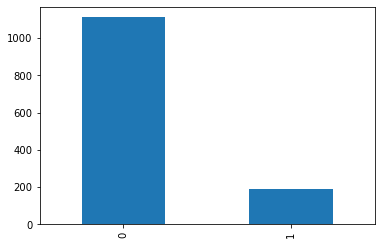

In [369]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

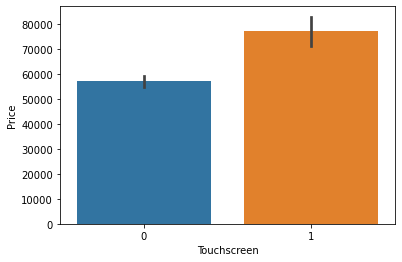

In [370]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])
plt.show()

In [371]:
# Creating a new column 'Touchscreen' from 
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [372]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
450,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381.92,0,0
587,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,89137.44,0,1
675,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,68944.32,0,0
1230,Lenovo,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,87912.00,1,1
1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,83063.52,0,0


<AxesSubplot:>

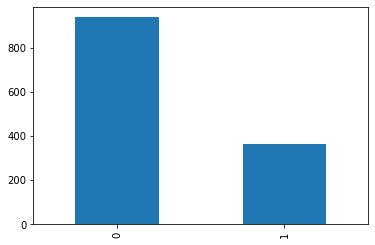

In [373]:
df['Ips'].value_counts().plot(kind='bar')

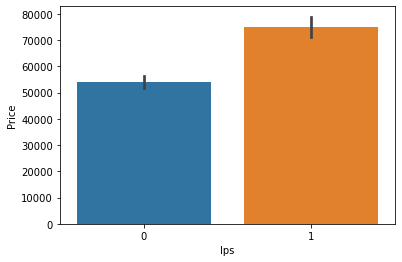

In [374]:
sns.barplot(x=df['Ips'], y=df['Price'])
plt.show()

In [375]:
# Separating X resolution and Y resolution into two columns 
# Here n = number of splits, 
new_df = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [376]:
df['Y_res'] = new_df[1]
df['X_res'] = new_df[0]

In [377]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Y_res,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,IPS Panel Retina Display 2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,Full HD 1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,IPS Panel Retina Display 2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,IPS Panel Retina Display 2560


In [378]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [379]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Y_res,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [380]:
print(df['X_res'].dtype)
print(df['Y_res'].dtype)

object
object


In [381]:
df[['X_res', 'Y_res']] = df[['X_res', 'Y_res']].astype('int32')

In [382]:
print(df['X_res'].dtype)
print(df['Y_res'].dtype)

int32
int32


In [383]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Y_res          0.552809
X_res          0.556529
Name: Price, dtype: float64

In [384]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [385]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Y_res,X_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005


In [386]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Y_res          0.552809
X_res          0.556529
ppi            0.473487
Name: Price, dtype: float64

In [387]:
# Dropping ScreenResolution column 
df.drop('ScreenResolution', axis=1, inplace=True)

In [388]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Y_res,X_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005


In [389]:
# Dropping Inches, X_res, Y_res columns 
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [390]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [391]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i5 2.0GHz             1
Intel Core i5 7500U 2.7GHz       1
Intel Core i7 2.8GHz             1
Intel Core i7 7700HQ 2.7GHz      1
Intel Core i5 1.3GHz             1
Name: Cpu, Length: 118, dtype: int64

In [392]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [393]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [394]:
def check_processor(data):
    if data == "Intel Core i7" or data == "Intel Core i5" or data == "Intel Core i3":
        return data
    elif data.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return 'AMD Processor'

In [395]:
df['Cpu Brand'] = df['Cpu Name'].apply(check_processor)

In [396]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
649,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,84395.5200,0,1,176.232574,Intel Core i7,Intel Core i7
230,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0,100.454670,Intel Core i3,Intel Core i3
818,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,1,127.335675,Intel Core i7,Intel Core i7
191,Vero,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.8000,0,1,157.350512,Intel Celeron Dual,Other Intel Processor
1260,Lenovo,2 in 1 Convertible,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,44382.7728,1,0,157.350512,Intel Core i5,Intel Core i5
1143,HP,Workstation,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.1200,0,1,141.211998,Intel Core i7,Intel Core i7
295,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.7200,0,1,141.211998,Intel Core i7,Intel Core i7
862,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.05,68464.8000,0,0,165.632118,Intel Core i5,Intel Core i5
804,Dell,Netbook,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.63,39640.3200,0,0,135.094211,Intel Pentium Quad,Other Intel Processor
635,Asus,Notebook,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,48304.7136,0,0,141.211998,Intel Core i5,Intel Core i5


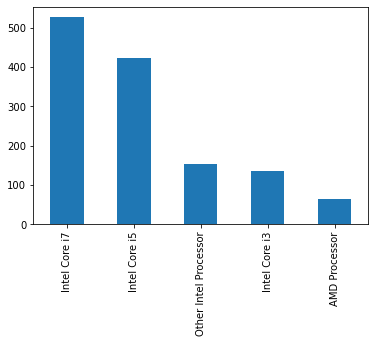

In [397]:
df['Cpu Brand'].value_counts().plot(kind='bar')
plt.show()

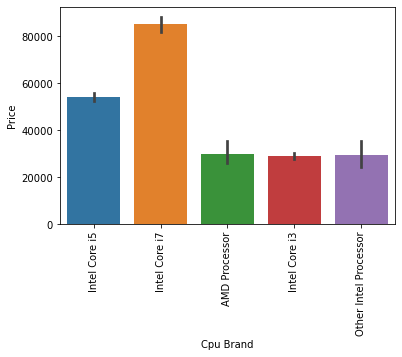

In [398]:
sns.barplot(x = df['Cpu Brand'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [399]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [400]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


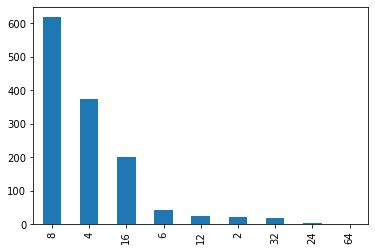

In [401]:
df['Ram'].value_counts().plot(kind='bar')
plt.show()

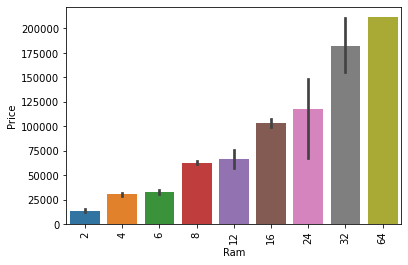

In [402]:
sns.barplot(x = df['Ram'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [403]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
64GB SSD                           1
5

In [404]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

new          = df['Memory'].str.split('+', n=1, expand=True)
df['first']  = new[0]
df['first']  = df['first'].str.strip() 
df['second'] = new[1]

df['Layer1HDD']           = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD']           = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid']        = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r"\D", "", regex=True)
df['second'].fillna("0", inplace=True)

df['Layer2HDD']           = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD']           = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid']        = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['second'] = df['second'].str.replace(r"\D", "", regex=True)
df['first']  = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD']           = ( df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'] )
df['SSD']           = ( df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'] )
df['Hybrid']        = ( df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'] )
df['Flash_Storage'] = ( df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage'] )

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer2HDD', 'Layer1SSD', 'Layer2SSD', 'Layer1Hybrid',
                'Layer2Hybrid', 'Layer1Flash_Storage', 'Layer2Flash_Storage'], inplace=True)

In [405]:
df.sample(50)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
359,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.360,76030.5600,0,0,157.350512,Intel Core i5,0,256,0,0
527,Lenovo,Notebook,8,2000 HDD,Nvidia GeForce 920MX,No OS,2.200,24455.5200,0,0,100.454670,Intel Core i3,2000,0,0,0
733,Acer,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.400,29783.5200,0,0,100.454670,Intel Core i5,500,0,0,0
246,HP,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.040,29783.5200,1,0,100.454670,Intel Core i5,1000,0,0,0
726,Dell,Notebook,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.200,38308.3200,0,0,141.211998,Intel Core i5,1000,128,0,0
671,Lenovo,Notebook,8,128 SSD + 1000 HDD,AMD Radeon R5 M430,Windows 10,1.900,43580.3760,0,0,141.211998,Intel Core i5,1000,128,0,0
642,Lenovo,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.140,130536.0000,0,1,157.350512,Intel Core i7,0,512,0,0
205,Lenovo,Gaming,16,512 SSD,Nvidia GeForce GTX 1060,No OS,2.400,74485.4400,0,0,141.211998,Intel Core i7,0,512,0,0
1213,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,2.191,53226.7200,1,1,141.211998,Intel Core i5,0,256,0,0
1119,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,3.520,69929.4672,0,0,127.335675,Intel Core i7,1000,128,0,0


In [406]:
df.drop("Memory", axis=1, inplace=True)

In [407]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [408]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [409]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [410]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [411]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [412]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [413]:
# Removing record having 'ARM' as Gpu brand
df = df[df['Gpu Brand'] != 'ARM']

In [414]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

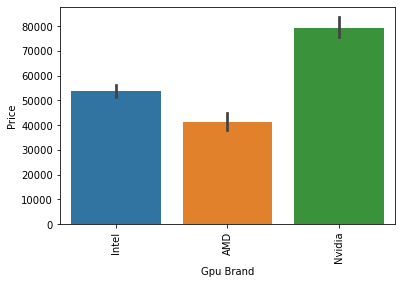

In [415]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [416]:
df.drop("Gpu", axis=1, inplace=True)

In [417]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [418]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

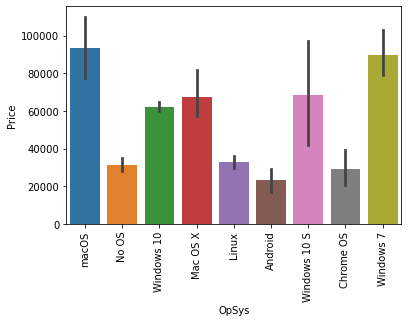

In [419]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [420]:
def os_category(data):
    if data == "Windows 10" or data == "Windows 7" or data == "Windows 10 S":
        return "Windows"
    elif data == "macOS" or data == "Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"

In [421]:
df['os'] = df['OpSys'].apply(os_category)

In [422]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [423]:
df.drop("OpSys", axis=1, inplace=True)

In [424]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


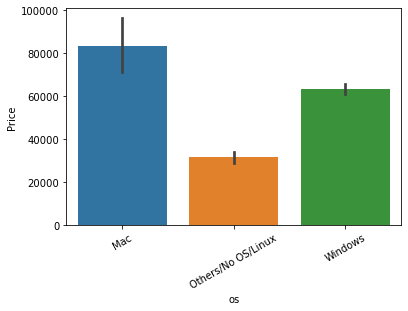

In [425]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='30')
plt.show()

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


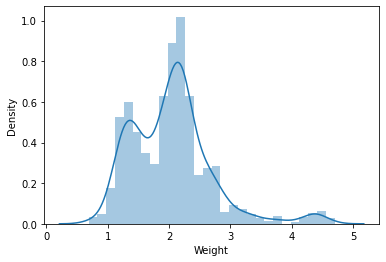

In [426]:
sns.distplot(df['Weight'])
plt.show()

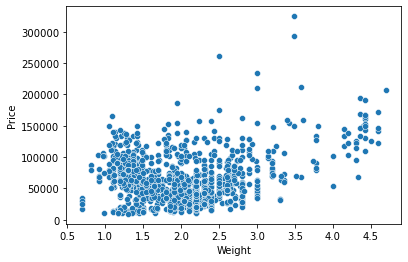

In [427]:
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.show()

In [428]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

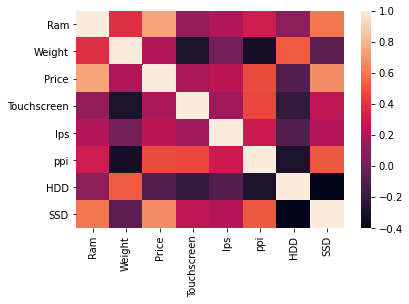

In [429]:
sns.heatmap(df.corr())
plt.show()

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


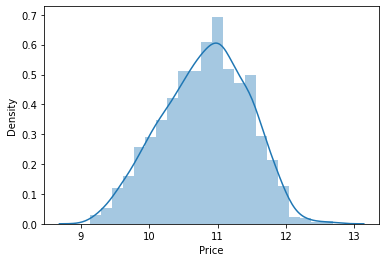

In [430]:
sns.distplot(np.log(df['Price']))
plt.show()

In [431]:
# Seperating dependent and independent columns
# Dependent columns 
X = df.drop("Price", axis=1)
y = np.log(df["Price"])

In [432]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [433]:
# Doing train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [434]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [435]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

In [436]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1193
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1106 non-null   object 
 1   TypeName     1106 non-null   object 
 2   Ram          1106 non-null   int32  
 3   Weight       1106 non-null   float32
 4   Touchscreen  1106 non-null   int64  
 5   Ips          1106 non-null   int64  
 6   ppi          1106 non-null   float64
 7   Cpu Brand    1106 non-null   object 
 8   HDD          1106 non-null   int64  
 9   SSD          1106 non-null   int64  
 10  Gpu Brand    1106 non-null   object 
 11  os           1106 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(4), object(5)
memory usage: 103.7+ KB


In [437]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("Linear Regression R2 Score:",r2_score(y_test, y_pred))
print("Linear Regression MAE:",mean_absolute_error(y_test, y_pred))

Linear Regression R2 Score: 0.8073277448418521
Linear Regression MAE: 0.21017827976429174


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [438]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("Ridge Regression R2 Score:",r2_score(y_test, y_pred))
print("Ridge Regression MAE:",mean_absolute_error(y_test, y_pred))

Ridge Regression R2 Score: 0.8127331031311811
Ridge Regression MAE: 0.20926802242582954


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [439]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("Lasso Regression R2 Score:",r2_score(y_test, y_pred))
print("Lasso Regression MAE:",mean_absolute_error(y_test, y_pred))

Lasso Regression R2 Score: 0.8071853945317105
Lasso Regression MAE: 0.21114361613472565


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [440]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("KNN Regression R2 Score:",r2_score(y_test, y_pred))
print("KNN Regression MAE:",mean_absolute_error(y_test, y_pred))

KNN Regression R2 Score: 0.803148868705085
KNN Regression MAE:

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 0.19264883332948868


In [441]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("DecisionTree Regression R2 Score:",r2_score(y_test, y_pred))
print("DecisionTree Regression MAE:",mean_absolute_error(y_test, y_pred))

DecisionTree Regression R2 Score: 0.8372732752575295
DecisionTree Regression MAE: 0.18360536279906509


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [442]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("SVR Regression R2 Score:",r2_score(y_test, y_pred))
print("SVR Regression MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVR Regression R2 Score: 0.8083180902257614
SVR Regression MAE: 0.20239059427481307


In [443]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("RandomForest Regression R2 Score:",r2_score(y_test, y_pred))
print("RandomForest Regression MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomForest Regression R2 Score: 0.8873402378382488
RandomForest Regression MAE: 0.15860130110457718


In [444]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                           )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("ExtraTree Regression R2 Score:",r2_score(y_test, y_pred))
print("ExtraTree Regression MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ExtraTree Regression R2 Score: 0.8753793123440623
ExtraTree Regression MAE: 0.15979519126758127


In [445]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("AdaBoost Regression R2 Score:",r2_score(y_test, y_pred))
print("AdaBoost Regression MAE:",mean_absolute_error(y_test, y_pred))

AdaBoost Regression R2 Score: 0.7816594423714829
AdaBoost Regression MAE: 0.23401608955528827


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [446]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("GradientBoosting Regression R2 Score:",r2_score(y_test, y_pred))
print("GradientBoosting Regression MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GradientBoosting Regression R2 Score: 0.8819981096129078
GradientBoosting Regression MAE: 0.15927990089404528


In [447]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("XGBRegressor R2 Score:",r2_score(y_test, y_pred))
print("GXGBRegressor MAE:",mean_absolute_error(y_test, y_pred))

XGBRegressor R2 Score: 0.8811773435850243
GXGBRegressor MAE: 0.16496203512600974


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [448]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("VotingRegressor R2 Score:",r2_score(y_test, y_pred))
print("VotingRegressor MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


VotingRegressor R2 Score: 0.8906771848967329
VotingRegressor MAE: 0.15842611376807947


In [449]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("StackingRegressor R2 Score:",r2_score(y_test, y_pred))
print("StackingRegressor MAE:",mean_absolute_error(y_test, y_pred))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


StackingRegressor R2 Score: 0.8803344234288587
StackingRegressor MAE: 0.16712940859702374


# Check performance of all models ata once

In [450]:
VR_Model = VotingRegressor([
            ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)), 
            ('gbdt', GradientBoostingRegressor(n_estimators=100,max_features=0.5)), 
            ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)), 
            ('et',ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10))
            ],weights=[5,1,1,1])

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

SR_Model = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

model_dict = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.001),
    'KNN': KNeighborsRegressor(n_neighbors=3),
    'DecisionTree Regressor': DecisionTreeRegressor(max_depth=8),
    'SVR': SVR(kernel='rbf',C=10000,epsilon=0.1),
    'RandomForest Regressor': RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15),
    'ExtraTree Regressor': ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=None, max_features=0.75, max_depth=15),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=15,learning_rate=1.0),
    'GradientBoosting Regressor': GradientBoostingRegressor(n_estimators=500),
    'XGBRegressor': XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5),
    'Voting Regressor': VR_Model,
    'Stacking Regressor': SR_Model
}

In [451]:
def evaluate(model_dict):
    model_name_list = []
    r2_score_list = []
    mae_list = []
    
    for i in range(len(list(model_dict))):
        
        model_name = list(model_dict.keys())[i]
        model = model_dict[model_name]
        
        step1 = ColumnTransformer(transformers=[
            ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
        ],remainder='passthrough')
        
        step2 = model

        pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
        ])

        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        
        model_name_list.append(model_name)
        r2_score_list.append(r2_score(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        
    return model_name_list, r2_score_list, mae_list

In [452]:
model_name_list, r2_score_list, mae_list = evaluate(model_dict)
new_df = pd.DataFrame({'Model Name': model_name_list, 'R2 Score': r2_score_list, 'MAE': mae_list})
print(new_df)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

                    Model Name  R2 Score       MAE
0            Linear Regression  0.807328  0.210178
1                        Ridge  0.812733  0.209268
2                        Lasso  0.807185  0.211144
3                          KNN  0.803149  0.192649
4       DecisionTree Regressor  0.841743  0.181867
5                          SVR  0.808318  0.202391
6       RandomForest Regressor  0.887340  0.158601
7          ExtraTree Regressor  0.875379  0.159795
8           AdaBoost Regressor  0.797104  0.226959
9   GradientBoosting Regressor  0.883491  0.158930
10                XGBRegressor  0.881177  0.164962
11            Voting Regressor  0.890004  0.158419
12          Stacking Regressor  0.881278  0.167357


In [453]:
new_df = new_df.sort_values(by=['R2 Score'], ascending=False)
print(new_df)

                    Model Name  R2 Score       MAE
11            Voting Regressor  0.890004  0.158419
6       RandomForest Regressor  0.887340  0.158601
9   GradientBoosting Regressor  0.883491  0.158930
12          Stacking Regressor  0.881278  0.167357
10                XGBRegressor  0.881177  0.164962
7          ExtraTree Regressor  0.875379  0.159795
4       DecisionTree Regressor  0.841743  0.181867
1                        Ridge  0.812733  0.209268
5                          SVR  0.808318  0.202391
0            Linear Regression  0.807328  0.210178
2                        Lasso  0.807185  0.211144
3                          KNN  0.803149  0.192649
8           AdaBoost Regressor  0.797104  0.226959


In [454]:
# Dumping dataframe and column transformer object as pickle file 
import pickle 

#####   We are using the pipe from the Random Forest  #####
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

pickle.dump(df,open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [455]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [456]:
X_train['Gpu Brand'].unique()

array(['Intel', 'Nvidia', 'AMD'], dtype=object)